In [11]:
import pandas as pd

Etapa 01) Análise Descritiva

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/MKT.csv')

In [14]:
df.info()  # Verifica tipos de dados e valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [15]:
df.describe()  # Estatísticas descritivas

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [16]:
df.head()  # Mostra as primeiras linhas

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [17]:
df.isnull().sum()  # Verifica valores nulos

,0
youtube,0
facebook,0
newspaper,0
sales,0


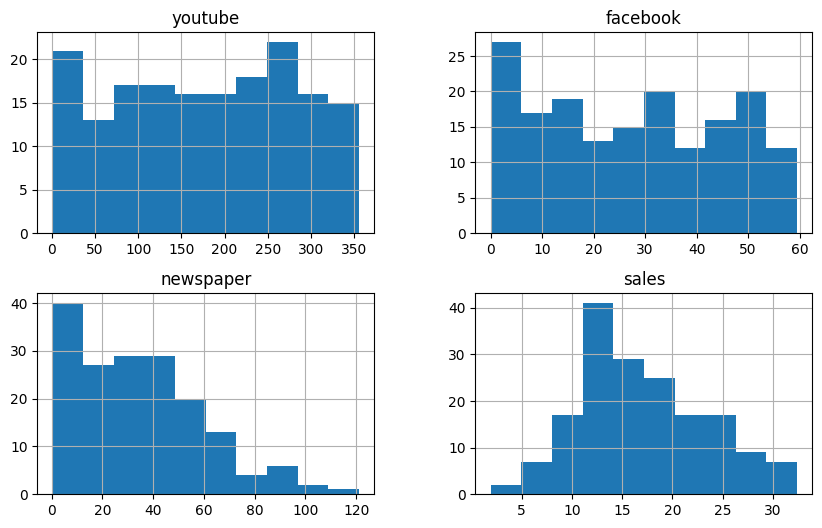

In [18]:
df.hist(figsize=(10, 6))
plt.show()

Etapa 02) Análise Exploratória

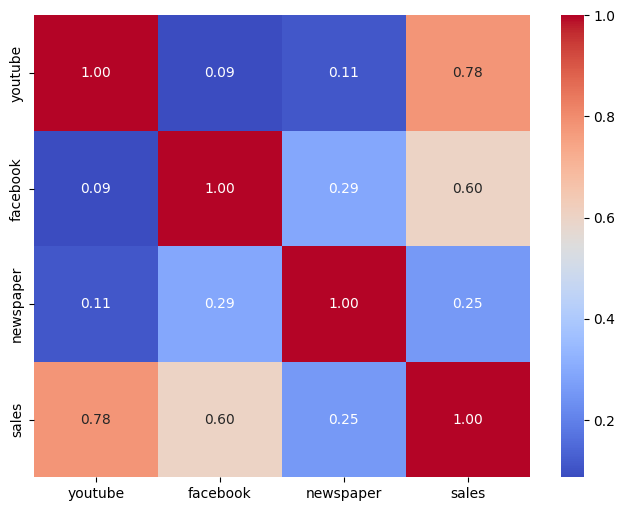

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

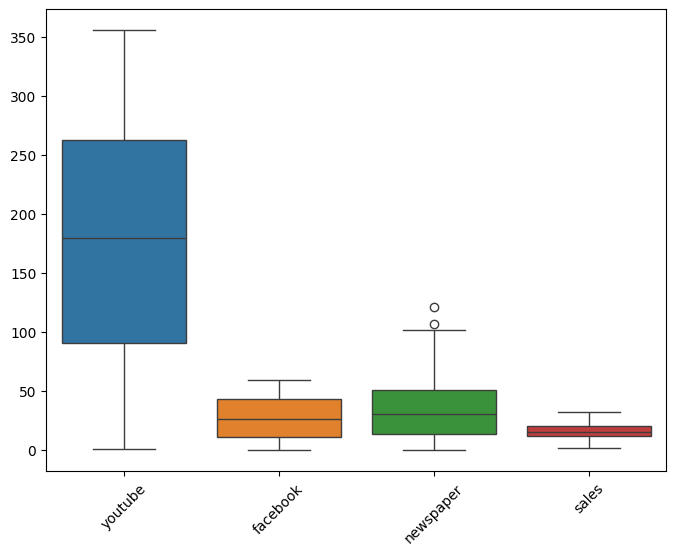

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

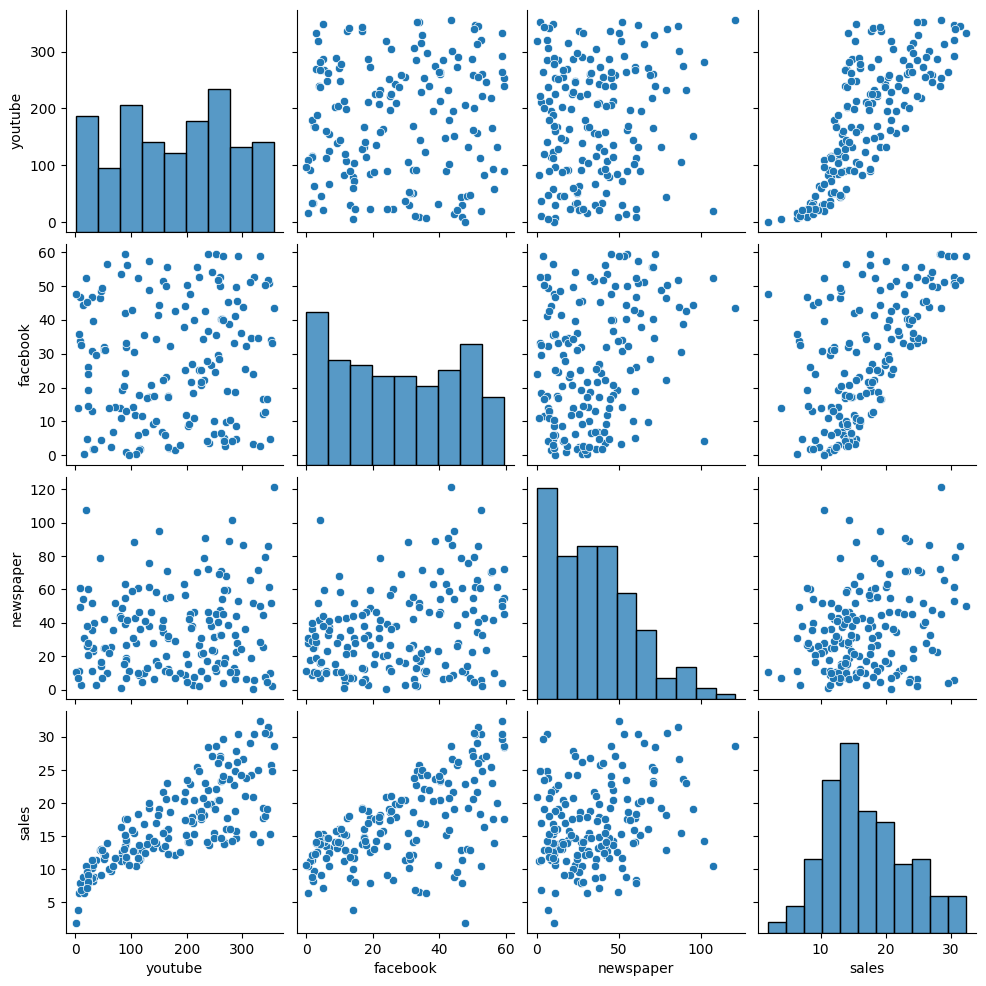

In [21]:
sns.pairplot(df)
plt.show()

Etapa 03) Modelagem (Regressão Simples)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
X = df[['youtube', 'facebook', 'newspaper']]  # Variáveis independentes
y = df['sales']  # Variável dependente (vendas)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [35]:
print(f'Coeficiente: {modelo.coef_[0]}')
print(f'Intercepto: {modelo.intercept_}')

Coeficiente: 0.0441858407408404
Intercepto: 3.7030498901645927


Etapa 04) Calculando Previsões

In [36]:
y_pred = modelo.predict(X_test)


In [37]:
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred))
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred))


Erro Absoluto Médio (MAE): 1.4034372074821055
Erro Quadrático Médio (MSE): 5.576790234026713
Coeficiente de Determinação (R²): 0.872863085701216


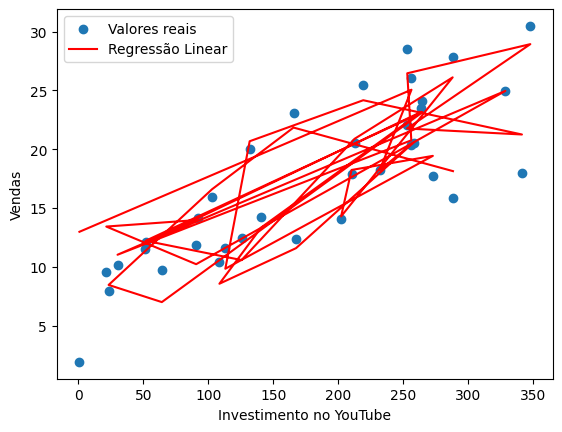

In [39]:
import matplotlib.pyplot as plt

# Usando apenas o investimento do YouTube para prever vendas
plt.scatter(X_test['youtube'], y_test, label='Valores reais')
plt.plot(X_test['youtube'], y_pred, color='red', label='Regressão Linear')

plt.xlabel('Investimento no YouTube')
plt.ylabel('Vendas')
plt.legend()
plt.show()


In [42]:
novo_investimento = np.array([[10000, 5000, 2000]])  # Exemplo: R$10.000 em youtube, R$5.000 em facebook, R$2.000 em newspaper
previsao = modelo.predict(novo_investimento)

print(f'Previsão de vendas para um investimento de R$ 10.000 (YouTube), R$ 5.000 (Facebook) e R$ 2.000 (Newspaper): {previsao[0]:.2f}')


Previsão de vendas para um investimento de R$ 10.000 (YouTube), R$ 5.000 (Facebook) e R$ 2.000 (Newspaper): 1417.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
